# Museum Visitor Model Analysis

In [ ]:
# Import required libraries (from scipy-notebook docker image)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from pathlib import Path
import sqlite3
from data_science import get_linear_regression_model

In [ ]:
# Optional (fetch json)
if True:
    from data_fetcher import get_museum_visitors

    url = "https://en.wikipedia.org/wiki/List_of_most-visited_museums"
    data = get_museum_visitors(url)

In [ ]:
if True:
    print(data)

In [ ]:
# Load and train the model
cache_path = Path("cache")
museum_path = cache_path / "museum_data.json"
db_path = cache_path / "local.db"
db = sqlite3.connect(db_path)

# Recreate the model
df = pd.read_sql(
    "SELECT City.population, City.avg_museum_visitors_per_year FROM City WHERE City.population > 200_000",
    db,
)
sklearn_model = get_linear_regression_model(df)
print(df[["population"]].shape[0])

# -Or, Load the linear regression model from cache
model_path = Path("cache/linear_regression_model.joblib")
model = load(model_path)

# Load museum data from JSON and set in df
df = pd.read_json(museum_path, orient="index")
df.index.name = "City"
df.head()

In [3]:
# Filter cities with population > 20,000
population_cutoff = 10_000
df_filtered = df[df["population"] > population_cutoff].copy()
df_sorted = df_filtered.sort_values(by="population", ascending=True)
df_sorted.head()

,population,visitors
City,,
Florence,195617,2461371
Bilbao,349881,1301343
"Washington,_D.C.",427701,3034135
Edinburgh,488050,2314974
Amsterdam,499041,1840000


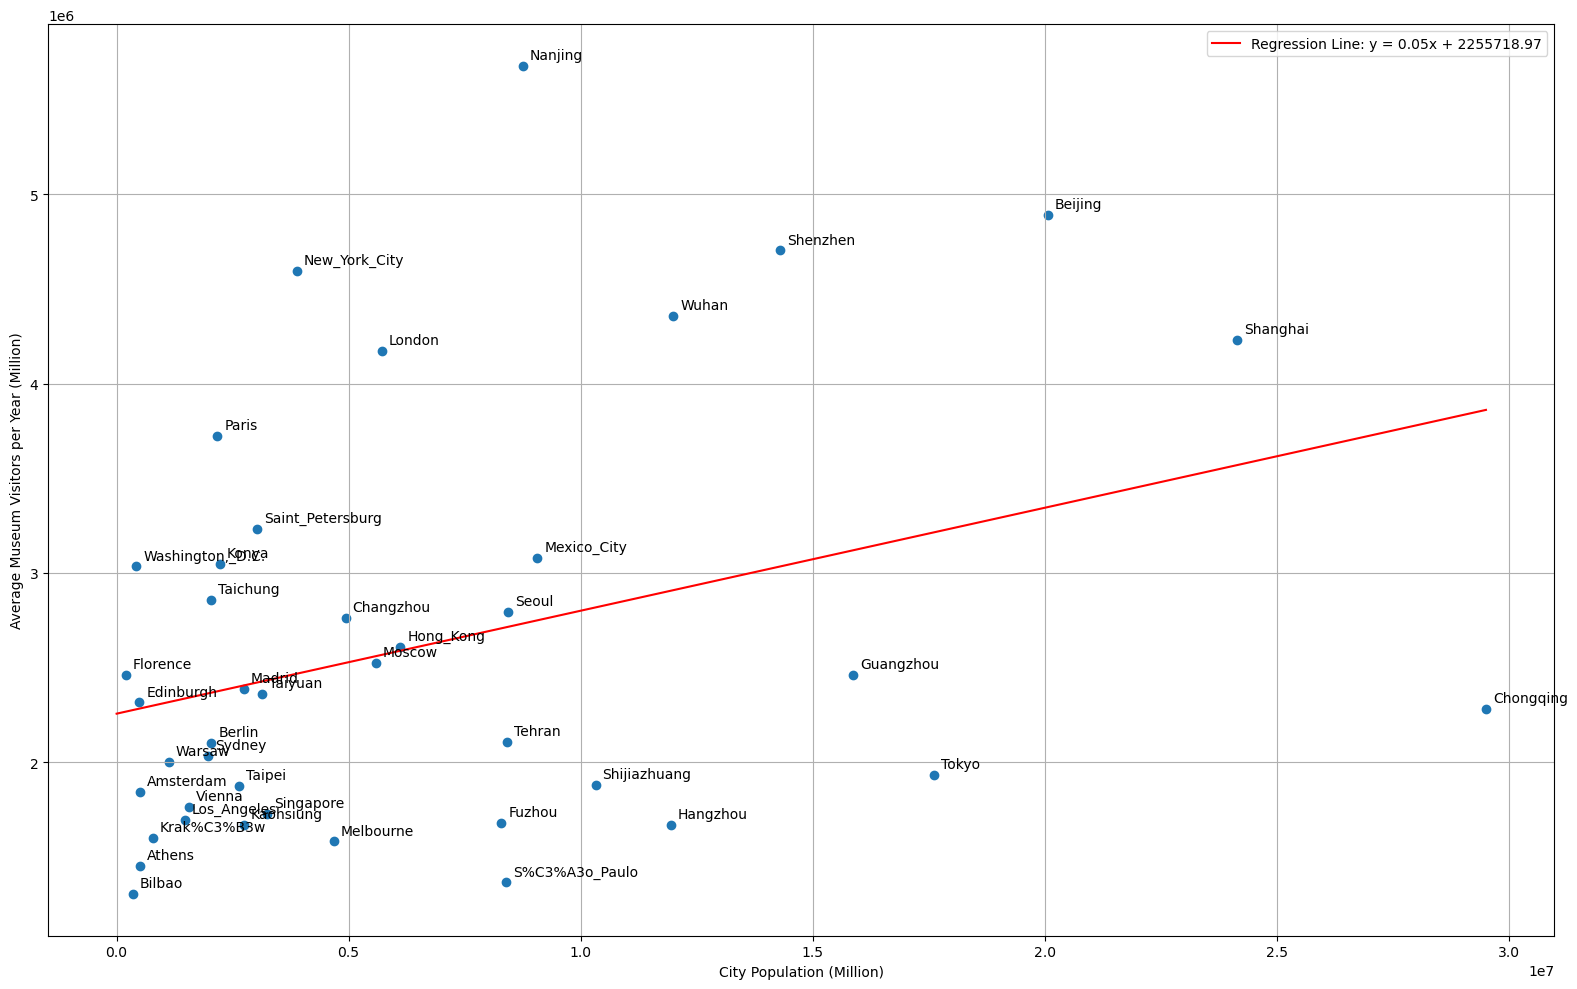

In [4]:
# # Vizualize in scatter plot with regression line

# 1. Extract model coefficients
slope = model.coef_[0]
intercept = model.intercept_

# 2. Define the plotting range for the X-axis using the population range
pop_max = df_sorted["population"].max()
X_range = np.linspace(0, pop_max, 2)  # Create 2 evenly spaced points

# 3. Calculate the predicted Y values (Visitors)
Y_predicted = (slope * X_range) + intercept

# 4. Start the Plotting
plt.figure(figsize=(16, 10))

# Plot actual data points
plt.scatter(df_sorted["population"], df_sorted["visitors"])

# Add city name labels (Keep this section)
for city, row in df_filtered.iterrows():
    plt.annotate(
        city,
        (row["population"], row["visitors"]),
        xytext=(5, 5),
        textcoords="offset points",
    )

# Plot the regression line using the calculated range
plt.plot(
    X_range,
    Y_predicted,
    color="red",
    label=f"Regression Line: y = {slope:.2f}x + {intercept:.2f}",
)

# Axis formatting
plt.xlabel("City Population (Million)")
plt.ylabel("Average Museum Visitors per Year (Million)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()